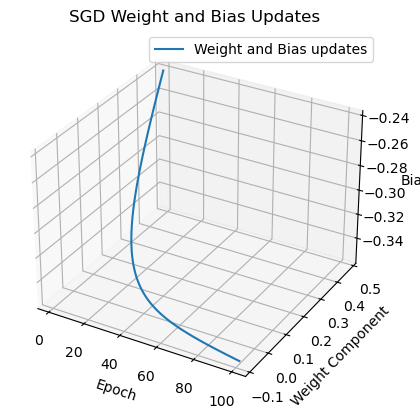

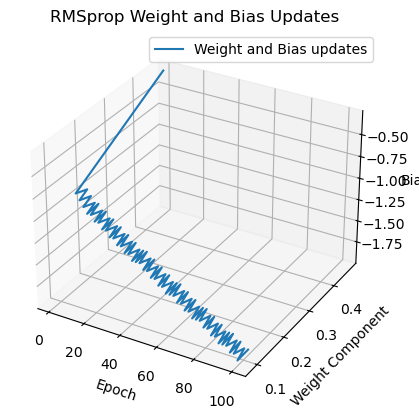

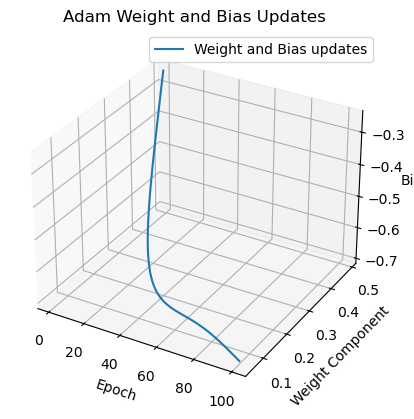

In [4]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

# Load dataset
iris = load_iris()
X = iris.data[:100]  # Select only the first two classes for binary classification
y = iris.target[:100].reshape(-1, 1)  # Reshape to column vector

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize parameters
np.random.seed(42)
w = np.random.randn(X_train.shape[1], 1)
b = np.random.randn(1)
α = 0.01

initial_w = w.copy()
initial_b = b.copy()

# Hyperparameters for Adam
β1 = 0.9
β2 = 0.999
ϵ = 1e-8

# Initialize Adam variables
v_dw = np.zeros_like(w)
S_dw = np.zeros_like(w)
v_db = 0
S_db = 0

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute gradients
def compute_gradients(X, y, w, b):
    m = X.shape[0]
    y_pred = sigmoid(np.dot(X, w) + b)
    dw = (1/m) * np.dot(X.T, (y_pred - y))
    db = (1/m) * np.sum(y_pred - y)
    return dw, db

# Update parameters using Adam
def update_adam(w, b, dw, db, t, α, v_dw, S_dw, v_db, S_db, β1=0.9, β2=0.999, ϵ=1e-8):
    # Update biased first moment estimates
    v_dw = β1 * v_dw + (1 - β1) * dw
    v_db = β1 * v_db + (1 - β1) * db
    # Update biased second moment estimates
    S_dw = β2 * S_dw + (1 - β2) * (dw ** 2)
    S_db = β2 * S_db + (1 - β2) * (db ** 2)
    # Compute bias-corrected first moment estimates
    v_dw_corrected = v_dw / (1 - β1 ** t)
    v_db_corrected = v_db / (1 - β1 ** t)
    # Compute bias-corrected second moment estimates
    S_dw_corrected = S_dw / (1 - β2 ** t)
    S_db_corrected = S_db / (1 - β2 ** t)
    # Update parameters
    w -= α * v_dw_corrected / (np.sqrt(S_dw_corrected) + ϵ)
    b -= α * v_db_corrected / (np.sqrt(S_db_corrected) + ϵ)
    return w, b, v_dw, S_dw, v_db, S_db

# Training
num_epochs = 100
weight_updates_adam = []
bias_updates_adam = []

w_adam = initial_w.copy()
b_adam = initial_b.copy()

for epoch in range(num_epochs):
    t = epoch + 1
    dw, db = compute_gradients(X_train, y_train, w_adam, b_adam)
    w_adam, b_adam, v_dw, S_dw, v_db, S_db = update_adam(w_adam, b_adam, dw, db, t, α, v_dw, S_dw, v_db, S_db, β1, β2, ϵ)
    weight_updates_adam.append(w_adam.copy())
    bias_updates_adam.append(b_adam.copy())

# Plotting
def plot_3d(weight_updates, bias_updates, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    epochs = range(1, num_epochs + 1)
    weight_updates_flat = np.array(weight_updates).reshape(num_epochs, -1)
    bias_updates_flat = np.array(bias_updates).reshape(num_epochs, -1)
    ax.plot(epochs, weight_updates_flat[:, 0], bias_updates_flat[:, 0], label='Weight and Bias updates')
    
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Weight Component')
    ax.set_zlabel('Bias')
    ax.set_title(f'{title} Weight and Bias Updates')
    ax.legend()
    plt.show()

plot_3d(weight_updates_sgd, bias_updates_sgd, 'SGD')
plot_3d(weight_updates_rmsprop, bias_updates_rmsprop, 'RMSprop')
plot_3d(weight_updates_adam, bias_updates_adam, 'Adam')
